## Position
After analysing some general properties about the text of the guiding principles, we will now have a closer look at their position in the text.

In [1]:
import sys
sys.path.append("..")
import os
from pathlib import Path
import io
import json

from tqdm import tqdm

from dataloading import get_ext_target_indices
from preprocessing import Tokenizer

In [2]:
tok = Tokenizer(Path("..")/".."/"model")
DATA_PATH = Path("..")/".."/"data"/"dataset"
DB_PATH = Path("..")/".."/"data"/"databases"/"extractive.db"

In [4]:
segment_len = []
indices = []
for file in tqdm(os.listdir(DATA_PATH)):
    with io.open(DATA_PATH/file, "r", encoding="utf-8") as f:
        verdict = json.load(f)
    segment_len.append((len(verdict["facts"]), len(verdict["reasoning"])))
    indices.append(get_ext_target_indices(DATA_PATH/file, DB_PATH, tok))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94104/94104 [07:14<00:00, 216.38it/s]


### Statistics

In [8]:
f_percentages = []
r_percentages = []
for l, ind in zip(segment_len, indices):
    f, r = l
    f_inds, r_inds = ind
    f_inds = [i/f for i in f_inds]
    f_percentages.append(f_inds)
    r_inds = [i/r for i in r_inds]
    r_percentages.append(r_inds)

In [17]:
import numpy as np
from functools import reduce

f_list = []
for f in f_percentages:
    f_list.extend(f)
r_list = []
for r in r_percentages:
    r_list.extend(r)

f = np.array(f_list)
r = np.array(r_list)

In [21]:
print("Golden labels from facts:", f.shape[0])
print("Golden labels from reasoning:", r.shape[0])

Golden labels from facts: 19672
Golden labels from reasoning: 251541


Density plot of relative position of gold labels


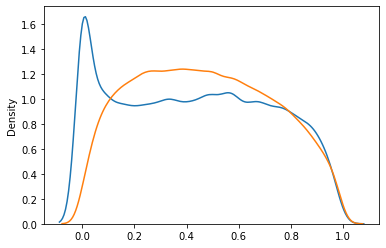

In [36]:
import seaborn as sns
sns.kdeplot(x=f)
sns.kdeplot(x=r)
print("Density plot of relative position of gold labels")

Cumulative density plot of relative position of gold labels


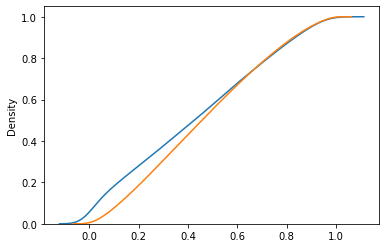

In [39]:
sns.kdeplot(x=f, cumulative=True)
sns.kdeplot(x=r, cumulative=True)
print("Cumulative density plot of relative position of gold labels")

In [54]:
f_avg = list(map(lambda perc: sum(perc)/len(perc) if len(perc) > 0 else 0.5, f_percentages))
r_avg = list(map(lambda perc: sum(perc)/len(perc) if len(perc) > 0 else 0.5, r_percentages))

In [55]:
f_len = np.array([f_avg, list(map(lambda x: x[0], segment_len))])
r_len = np.array([r_avg, list(map(lambda x: x[1], segment_len))])

Length document against average relative position


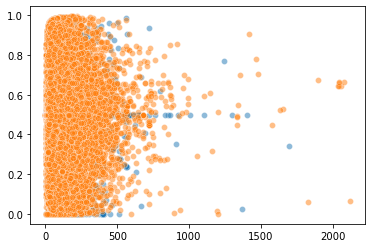

In [58]:
sns.scatterplot(x=f_len[1],y=f_len[0],alpha=0.5)
sns.scatterplot(x=r_len[1],y=r_len[0],alpha=0.5)
print("Length document against average relative position")